# 创建RDD

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("A").config("B","C").getOrCreate()
#""里面的内容都随意

In [2]:
myData=spark.sparkContext.parallelize([(1,2),(3,4),(5,6)])
#创建了一个RDD

In [3]:
myData.collect()

[(1, 2), (3, 4), (5, 6)]

# 创建DataFrame

## RDD.toDF

In [4]:
myData.toDF(["A","B"]).show()

+---+---+
|  A|  B|
+---+---+
|  1|  2|
|  3|  4|
|  5|  6|
+---+---+



## spark.createDataFrame()

local -> DF(RDD)

In [5]:
my_list=[['a',1,2],['b',2,3],['c',3,4]]
col_name=['A','B','C']
df=spark.createDataFrame(my_list,col_name)

In [6]:
df.show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  a|  1|  2|
|  b|  2|  3|
|  c|  3|  4|
+---+---+---+



## 读入外部数据



### spark.read.format()

In [7]:
df=spark.read.format('com.databricks.spark.csv').options(header='true',inferchema='true').\
    load(".//data//Advertising.csv",header=True) 
#header: 表头, inferschema: 自动推断数据类型

In [8]:
df.show()

+-----+-----+---------+-----+
|   TV|radio|newspaper|sales|
+-----+-----+---------+-----+
|230.1| 37.8|     69.2| 22.1|
| 44.5| 39.3|     45.1| 10.4|
| 17.2| 45.9|     69.3|  9.3|
|151.5| 41.3|     58.5| 18.5|
|180.8| 10.8|     58.4| 12.9|
|  8.7| 48.9|       75|  7.2|
| 57.5| 32.8|     23.5| 11.8|
|120.2| 19.6|     11.6| 13.2|
|  8.6|  2.1|        1|  4.8|
|199.8|  2.6|     21.2| 10.6|
| 66.1|  5.8|     24.2|  8.6|
|214.7|   24|        4| 17.4|
| 23.8| 35.1|     65.9|  9.2|
| 97.5|  7.6|      7.2|  9.7|
|204.1| 32.9|       46|   19|
|195.4| 47.7|     52.9| 22.4|
| 67.8| 36.6|      114| 12.5|
|281.4| 39.6|     55.8| 24.4|
| 69.2| 20.5|     18.3| 11.3|
|147.3| 23.9|     19.1| 14.6|
+-----+-----+---------+-----+
only showing top 20 rows



### read.csv()

In [9]:
ds=spark.read.csv(path='./data/Advertising.csv',header=True,inferSchema=True)

In [10]:
ds.show(3) #只看3行

+-----+-----+---------+-----+
|   TV|radio|newspaper|sales|
+-----+-----+---------+-----+
|230.1| 37.8|     69.2| 22.1|
| 44.5| 39.3|     45.1| 10.4|
| 17.2| 45.9|     69.3|  9.3|
+-----+-----+---------+-----+
only showing top 3 rows



# spark dataframe的基本操作

In [11]:
df.toPandas()
#这是Pandas dataframe，不是分布式的了（只在主节点上）

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177,9.3,6.4,12.8
198,283.6,42,66.2,25.5


In [12]:
print(df.columns)
print(df.dtypes)

['TV', 'radio', 'newspaper', 'sales']
[('TV', 'string'), ('radio', 'string'), ('newspaper', 'string'), ('sales', 'string')]


## 缺失值处理

In [13]:
import pandas as pd
my_list=[['male',1,None],['female',2,3],['male',3,4]]
dp=pd.DataFrame(my_list,columns=['A','B','C'])
dp

,A,B,C
0,male,1,NaN
1,female,2,3.0
2,male,3,4.0


In [14]:
ds=spark.createDataFrame(my_list,['A','B','C'])
ds.show()

+------+---+----+
|     A|  B|   C|
+------+---+----+
|  male|  1|null|
|female|  2|   3|
|  male|  3|   4|
+------+---+----+



In [15]:
dp=dp.fillna(-99)
dp

,A,B,C
0,male,1,-99.0
1,female,2,3.0
2,male,3,4.0


In [16]:
ds=ds.fillna(-99) #不是inplace型的
ds.show()

+------+---+---+
|     A|  B|  C|
+------+---+---+
|  male|  1|-99|
|female|  2|  3|
|  male|  3|  4|
+------+---+---+



## 替换

字符型类型变量转换成1和0

In [17]:
ds.na.replace(['male','female'],['1','0']).show()

+---+---+---+
|  A|  B|  C|
+---+---+---+
|  1|  1|-99|
|  0|  2|  3|
|  1|  3|  4|
+---+---+---+



In [18]:
#对pandas
dp.replace(['male','female'],[1,0],inplace=True)
dp

,A,B,C
0,1,1,-99.0
1,0,2,3.0
2,1,3,4.0


In [19]:
myData=spark.sparkContext.parallelize([(1,2),(3,4),(5,6)])
myData.take(1)

[(1, 2)]

## 改列名

In [20]:
ds.show()

+------+---+---+
|     A|  B|  C|
+------+---+---+
|  male|  1|-99|
|female|  2|  3|
|  male|  3|  4|
+------+---+---+



In [21]:
ds.toDF(*["A1","B1","C1"]).show()
#ds再toDF可以如上修改列名

+------+---+---+
|    A1| B1| C1|
+------+---+---+
|  male|  1|-99|
|female|  2|  3|
|  male|  3|  4|
+------+---+---+



In [4]:
ds=spark.read.csv(path='./data/Advertising.csv',header=True,inferSchema=True)
mapping={'newspaper':'C','sales':'D'}
new_names=[mapping.get(col,col) for col in ds.columns]
print(mapping.get('newspaper','newspaper')) #不在mapping里的
print(mapping.get('radio','radio')) #在mapping里的
print(new_names)

C
radio
['TV', 'radio', 'C', 'D']


In [5]:
ds.toDF(*new_names).show(4)

+-----+-----+----+----+
|   TV|radio|   C|   D|
+-----+-----+----+----+
|230.1| 37.8|69.2|22.1|
| 44.5| 39.3|45.1|10.4|
| 17.2| 45.9|69.3| 9.3|
|151.5| 41.3|58.5|18.5|
+-----+-----+----+----+
only showing top 4 rows



In [24]:
ds.withColumnRenamed("newspaper",'paper').show(4)
#只能改一列

+-----+-----+-----+-----+
|   TV|radio|paper|sales|
+-----+-----+-----+-----+
|230.1| 37.8| 69.2| 22.1|
| 44.5| 39.3| 45.1| 10.4|
| 17.2| 45.9| 69.3|  9.3|
|151.5| 41.3| 58.5| 18.5|
+-----+-----+-----+-----+
only showing top 4 rows



## 删除列

In [25]:
drop_name=['newspaper','sales']
ds.drop(*drop_name).show(4)

+-----+-----+
|   TV|radio|
+-----+-----+
|230.1| 37.8|
| 44.5| 39.3|
| 17.2| 45.9|
|151.5| 41.3|
+-----+-----+
only showing top 4 rows



## 数据过滤

In [26]:
ds[ds.newspaper<20].show(4) #类似布尔索引
ds[(ds.newspaper<20)&(ds.TV>100)].show(4)

+-----+-----+---------+-----+
|   TV|radio|newspaper|sales|
+-----+-----+---------+-----+
|120.2| 19.6|     11.6| 13.2|
|  8.6|  2.1|      1.0|  4.8|
|214.7| 24.0|      4.0| 17.4|
| 97.5|  7.6|      7.2|  9.7|
+-----+-----+---------+-----+
only showing top 4 rows

+-----+-----+---------+-----+
|   TV|radio|newspaper|sales|
+-----+-----+---------+-----+
|120.2| 19.6|     11.6| 13.2|
|214.7| 24.0|      4.0| 17.4|
|147.3| 23.9|     19.1| 14.6|
|262.9|  3.5|     19.5| 12.0|
+-----+-----+---------+-----+
only showing top 4 rows



## 创建新的一列

In [6]:
import pyspark.sql.functions as F
ds.withColumn('log_tv',F.log(ds.TV)).show(4) #不改变原数据
ds.withColumn('tv+10',ds.TV+10).show(4)

+-----+-----+---------+-----+------------------+
|   TV|radio|newspaper|sales|            log_tv|
+-----+-----+---------+-----+------------------+
|230.1| 37.8|     69.2| 22.1|  5.43851399704132|
| 44.5| 39.3|     45.1| 10.4|3.7954891891721947|
| 17.2| 45.9|     69.3|  9.3|2.8449093838194073|
|151.5| 41.3|     58.5| 18.5| 5.020585624949424|
+-----+-----+---------+-----+------------------+
only showing top 4 rows

+-----+-----+---------+-----+-----+
|   TV|radio|newspaper|sales|tv+10|
+-----+-----+---------+-----+-----+
|230.1| 37.8|     69.2| 22.1|240.1|
| 44.5| 39.3|     45.1| 10.4| 54.5|
| 17.2| 45.9|     69.3|  9.3| 27.2|
|151.5| 41.3|     58.5| 18.5|161.5|
+-----+-----+---------+-----+-----+
only showing top 4 rows



In [7]:
F.when(ds.TV<100,1).when(ds.TV<200,2).otherwise(3) 
#逐层往上套条件，第二个参数是返回值

Column<'CASE WHEN (TV < 100) THEN 1 WHEN (TV < 200) THEN 2 ELSE 3 END'>

In [29]:
ds.withColumn('codition',F.when(ds.TV<100,1).when(ds.TV<200,2).otherwise(3)).show(5)

+-----+-----+---------+-----+--------+
|   TV|radio|newspaper|sales|codition|
+-----+-----+---------+-----+--------+
|230.1| 37.8|     69.2| 22.1|       3|
| 44.5| 39.3|     45.1| 10.4|       1|
| 17.2| 45.9|     69.3|  9.3|       1|
|151.5| 41.3|     58.5| 18.5|       2|
|180.8| 10.8|     58.4| 12.9|       2|
+-----+-----+---------+-----+--------+
only showing top 5 rows



## 描述性统计量

In [30]:
ds=spark.read.csv(path='./data/german_credit.csv',header=True,inferSchema=True)
ds.show(1)

+-------------+---------------+--------------------------+---------------------------------+-------+-------------+--------------------+----------------------------+-------------------+--------------------+----------+---------------------------+-----------------------------+-----------+------------------+-----------------+--------------------------+----------+----------------+---------+--------------+
|Creditability|Account Balance|Duration of Credit (month)|Payment Status of Previous Credit|Purpose|Credit Amount|Value Savings/Stocks|Length of current employment|Instalment per cent|Sex & Marital Status|Guarantors|Duration in Current address|Most valuable available asset|Age (years)|Concurrent Credits|Type of apartment|No of Credits at this Bank|Occupation|No of dependents|Telephone|Foreign Worker|
+-------------+---------------+--------------------------+---------------------------------+-------+-------------+--------------------+----------------------------+-------------------+--------

In [31]:
num_cols=['Account Balance','No of dependents']
ds.columns

['Creditability',
 'Account Balance',
 'Duration of Credit (month)',
 'Payment Status of Previous Credit',
 'Purpose',
 'Credit Amount',
 'Value Savings/Stocks',
 'Length of current employment',
 'Instalment per cent',
 'Sex & Marital Status',
 'Guarantors',
 'Duration in Current address',
 'Most valuable available asset',
 'Age (years)',
 'Concurrent Credits',
 'Type of apartment',
 'No of Credits at this Bank',
 'Occupation',
 'No of dependents',
 'Telephone',
 'Foreign Worker']

In [32]:
ds.select(num_cols).show(4)
ds.select(num_cols).describe()
#注意describe里面都是string

+---------------+----------------+
|Account Balance|No of dependents|
+---------------+----------------+
|              1|               1|
|              1|               2|
|              2|               1|
|              1|               2|
+---------------+----------------+
only showing top 4 rows



DataFrame[summary: string, Account Balance: string, No of dependents: string]

In [37]:
ds.select(num_cols).describe().collect()
#里面都是string

[Row(summary='count', Account Balance='1000', No of dependents='1000'),
 Row(summary='mean', Account Balance='2.577', No of dependents='1.155'),
 Row(summary='stddev', Account Balance='1.2576377271108936', No of dependents='0.36208577175319395'),
 Row(summary='min', Account Balance='1', No of dependents='1'),
 Row(summary='max', Account Balance='4', No of dependents='2')]

In [33]:
ds.select(num_cols).describe().show()

+-------+------------------+-------------------+
|summary|   Account Balance|   No of dependents|
+-------+------------------+-------------------+
|  count|              1000|               1000|
|   mean|             2.577|              1.155|
| stddev|1.2576377271108936|0.36208577175319395|
|    min|                 1|                  1|
|    max|                 4|                  2|
+-------+------------------+-------------------+



In [34]:
#书P64
import numpy as np
def describe_pd(df_in,columns,deciles=False):
    '''输入一个ds，返回一个df'''
    if deciles:
        percentiles=np.array(range(0,110,10)) #密集分位点
    else:
        percentiles=[25,50,75]
    percs=np.transpose([np.percentile(df_in.select(x).collect(),percentiles) for x in columns])
    percs=pd.DataFrame(percs,columns=columns)   
    percs['summary']=[str(p)+'%' for p in percentiles]
    #以上计算得到了各分位点
    spark_describe=df_in.describe().toPandas()
    new_df=pd.concat([spark_describe,percs],ignore_index=True)
    new_df=new_df.round(2) #对float和double保留两位小数
    return new_df[['summary']+columns]

In [63]:
#书P64
import numpy as np
def describe_pd(df_in,columns,deciles=False):
    '''输入一个ds，返回一个df'''
    if deciles:
        percentiles=np.array(range(0,110,10)) #密集分位点
    else:
        percentiles=[25,50,75]
    percs=np.transpose([np.percentile(df_in.select(x).collect(),percentiles) for x in columns])
    percs=pd.DataFrame(percs,columns=columns)   
    percs['summary']=[str(p)+'%' for p in percentiles]
    #以上计算得到了各分位点
    spark_describe=df_in.describe()
    spark_describe2=spark_describe.withColumn('Account Balance',spark_describe['Account Balance'].cast('float'))\
        .withColumn('No of dependents',spark_describe['No of dependents'].cast('float')).toPandas()
    #withColumn中新增列的名字与已有的列的名字一样时，会替换已有的那一列
    #把字符串变成了浮点数
    new_df=pd.concat([spark_describe2,percs],ignore_index=True)
    new_df=new_df.round(2) #对float和double保留两位小数
    return new_df[['summary']+columns]

In [64]:
describe_pd(ds,num_cols,deciles=True)
#但是这里并没有保留两位小数
#因为ds.describe转为pandas之后里面的元素还是string类型

,summary,Account Balance,No of dependents
0,count,1000.00,1000.00
1,mean,2.58,1.15
2,stddev,1.26,0.36
3,min,1.00,1.00
4,max,4.00,2.00
5,0%,1.00,1.00
6,10%,1.00,1.00
7,20%,1.00,1.00
8,30%,2.00,1.00
9,40%,2.00,1.00


In [36]:
ds.select(F.skewness('Age (years)'),F.kurtosis('Age (years)')).show()
#偏度和峰度

+---------------------+---------------------+
|skewness(Age (years))|kurtosis(Age (years))|
+---------------------+---------------------+
|   1.0231743160548064|   0.6114371688367672|
+---------------------+---------------------+



In [40]:
spark_describe=ds.describe()

In [42]:
spark_describe["Account Balance"]
#不能show或者collect

Column<'Account Balance'>

In [43]:
spark_describe.select("Account Balance")
#可以show和collect

DataFrame[Account Balance: string]

In [66]:
deciles=False
df_in=ds
columns=num_cols
if deciles:
    percentiles=np.array(range(0,110,10)) #密集分位点
else:
    percentiles=[25,50,75]
percs=np.transpose([np.percentile(df_in.select(x).collect(),percentiles) for x in columns])
percs=pd.DataFrame(percs,columns=columns)
percs

,Account Balance,No of dependents
0,1.0,1.0
1,2.0,1.0
2,4.0,1.0


In [69]:
percs.round(2) #这个地方看一下回放

,Account Balance,No of dependents
0,1.0,1.0
1,2.0,1.0
2,4.0,1.0


In [70]:
percs.iloc[1,1]=1.1111
percs

,Account Balance,No of dependents
0,1.0,1.0000
1,2.0,1.1111
2,4.0,1.0000


In [71]:
percs.round(2)

,Account Balance,No of dependents
0,1.0,1.00
1,2.0,1.11
2,4.0,1.00


In [72]:
ds.collect()[0] #取出了第一行

Row(Creditability=1, Account Balance=1, Duration of Credit (month)=18, Payment Status of Previous Credit=4, Purpose=2, Credit Amount=1049, Value Savings/Stocks=1, Length of current employment=2, Instalment per cent=4, Sex & Marital Status=2, Guarantors=1, Duration in Current address=4, Most valuable available asset=2, Age (years)=21, Concurrent Credits=3, Type of apartment=1, No of Credits at this Bank=1, Occupation=3, No of dependents=1, Telephone=1, Foreign Worker=1)

In [73]:
ds.collect()[0][3] #取出某个元素

4

In [75]:
#ds.select的结果中提取出数字
type(ds.select(F.skewness('Age (years)'),F.kurtosis('Age (years)')).collect()[0][0])

float

In [77]:
df.dtypes #给sparkdataframe定义的

[('TV', 'string'),
 ('radio', 'string'),
 ('newspaper', 'string'),
 ('sales', 'string')]

In [78]:
ds.dtypes

[('Creditability', 'int'),
 ('Account Balance', 'int'),
 ('Duration of Credit (month)', 'int'),
 ('Payment Status of Previous Credit', 'int'),
 ('Purpose', 'int'),
 ('Credit Amount', 'int'),
 ('Value Savings/Stocks', 'int'),
 ('Length of current employment', 'int'),
 ('Instalment per cent', 'int'),
 ('Sex & Marital Status', 'int'),
 ('Guarantors', 'int'),
 ('Duration in Current address', 'int'),
 ('Most valuable available asset', 'int'),
 ('Age (years)', 'int'),
 ('Concurrent Credits', 'int'),
 ('Type of apartment', 'int'),
 ('No of Credits at this Bank', 'int'),
 ('Occupation', 'int'),
 ('No of dependents', 'int'),
 ('Telephone', 'int'),
 ('Foreign Worker', 'int')]

In [81]:
ds.select(F.skewness('Age (years)'),F.kurtosis('Age (years)')).dtypes

[('skewness(Age (years))', 'double'), ('kurtosis(Age (years))', 'double')]

## groupby

In [83]:
var='Age (years)'
ds.groupby(var).agg(F.count(var)).show()

+-----------+------------------+
|Age (years)|count(Age (years))|
+-----------+------------------+
|         31|                38|
|         65|                 5|
|         53|                 7|
|         34|                33|
|         28|                43|
|         26|                49|
|         27|                50|
|         44|                17|
|         22|                27|
|         47|                17|
|         52|                 9|
|         40|                27|
|         20|                14|
|         57|                 9|
|         54|                10|
|         48|                12|
|         19|                 2|
|         64|                 5|
|         41|                17|
|         43|                17|
+-----------+------------------+
only showing top 20 rows



In [86]:
ds.groupby(var).agg(F.count('No of dependents')).show()
#count就是算组内样本个数，当然不变。

+-----------+-----------------------+
|Age (years)|count(No of dependents)|
+-----------+-----------------------+
|         31|                     38|
|         65|                      5|
|         53|                      7|
|         34|                     33|
|         28|                     43|
|         26|                     49|
|         27|                     50|
|         44|                     17|
|         22|                     27|
|         47|                     17|
|         52|                      9|
|         40|                     27|
|         20|                     14|
|         57|                      9|
|         54|                     10|
|         48|                     12|
|         19|                      2|
|         64|                      5|
|         41|                     17|
|         43|                     17|
+-----------+-----------------------+
only showing top 20 rows



In [87]:
ds.groupby(var).agg(F.max('No of dependents')).show()

+-----------+---------------------+
|Age (years)|max(No of dependents)|
+-----------+---------------------+
|         31|                    2|
|         65|                    1|
|         53|                    2|
|         34|                    2|
|         28|                    2|
|         26|                    2|
|         27|                    1|
|         44|                    2|
|         22|                    1|
|         47|                    2|
|         52|                    1|
|         40|                    2|
|         20|                    2|
|         57|                    1|
|         54|                    2|
|         48|                    2|
|         19|                    1|
|         64|                    1|
|         41|                    2|
|         43|                    2|
+-----------+---------------------+
only showing top 20 rows



In [88]:
ds.groupby(var).agg(F.mean(var)).show()
#因为各组内age的值都是一样的

+-----------+----------------+
|Age (years)|avg(Age (years))|
+-----------+----------------+
|         31|            31.0|
|         65|            65.0|
|         53|            53.0|
|         34|            34.0|
|         28|            28.0|
|         26|            26.0|
|         27|            27.0|
|         44|            44.0|
|         22|            22.0|
|         47|            47.0|
|         52|            52.0|
|         40|            40.0|
|         20|            20.0|
|         57|            57.0|
|         54|            54.0|
|         48|            48.0|
|         19|            19.0|
|         64|            64.0|
|         41|            41.0|
|         43|            43.0|
+-----------+----------------+
only showing top 20 rows



# 画图

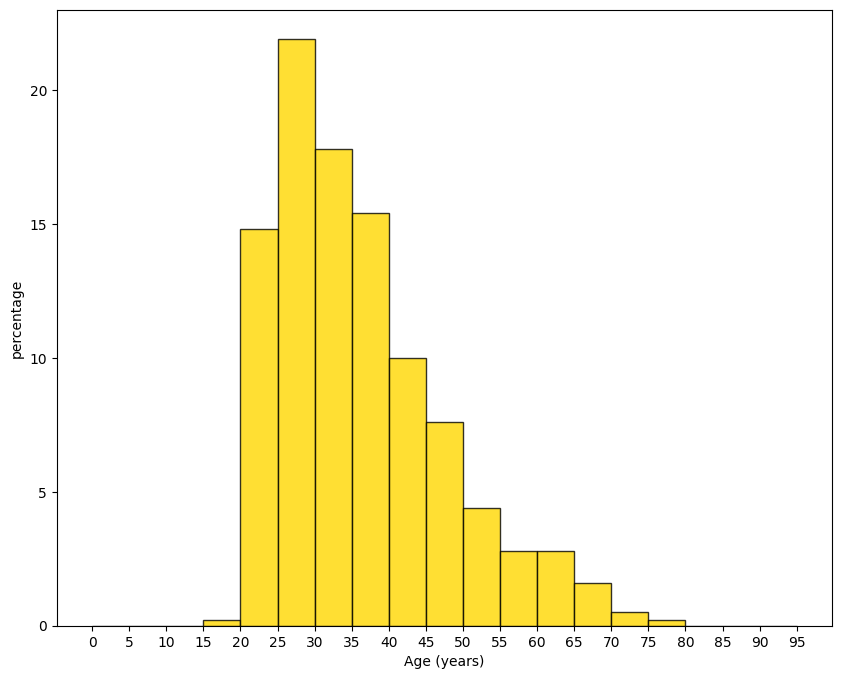

In [89]:
from scipy.stats import kurtosis, skew

df = spark.read.csv(path='./data/german_credit.csv', header = True, inferSchema = True)

var = 'Age (years)'
import matplotlib.pyplot as plt
import numpy as np
data1 = df.toPandas()

x = data1[var]
bins = np.arange(0, 100, 5.0) #每5岁划分一下
plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='gold',ec='black',weights=np.zeros_like(x) + 100. / x.size)

plt.xlabel(var)
plt.ylabel('percentage')
plt.xticks(bins)
plt.show()


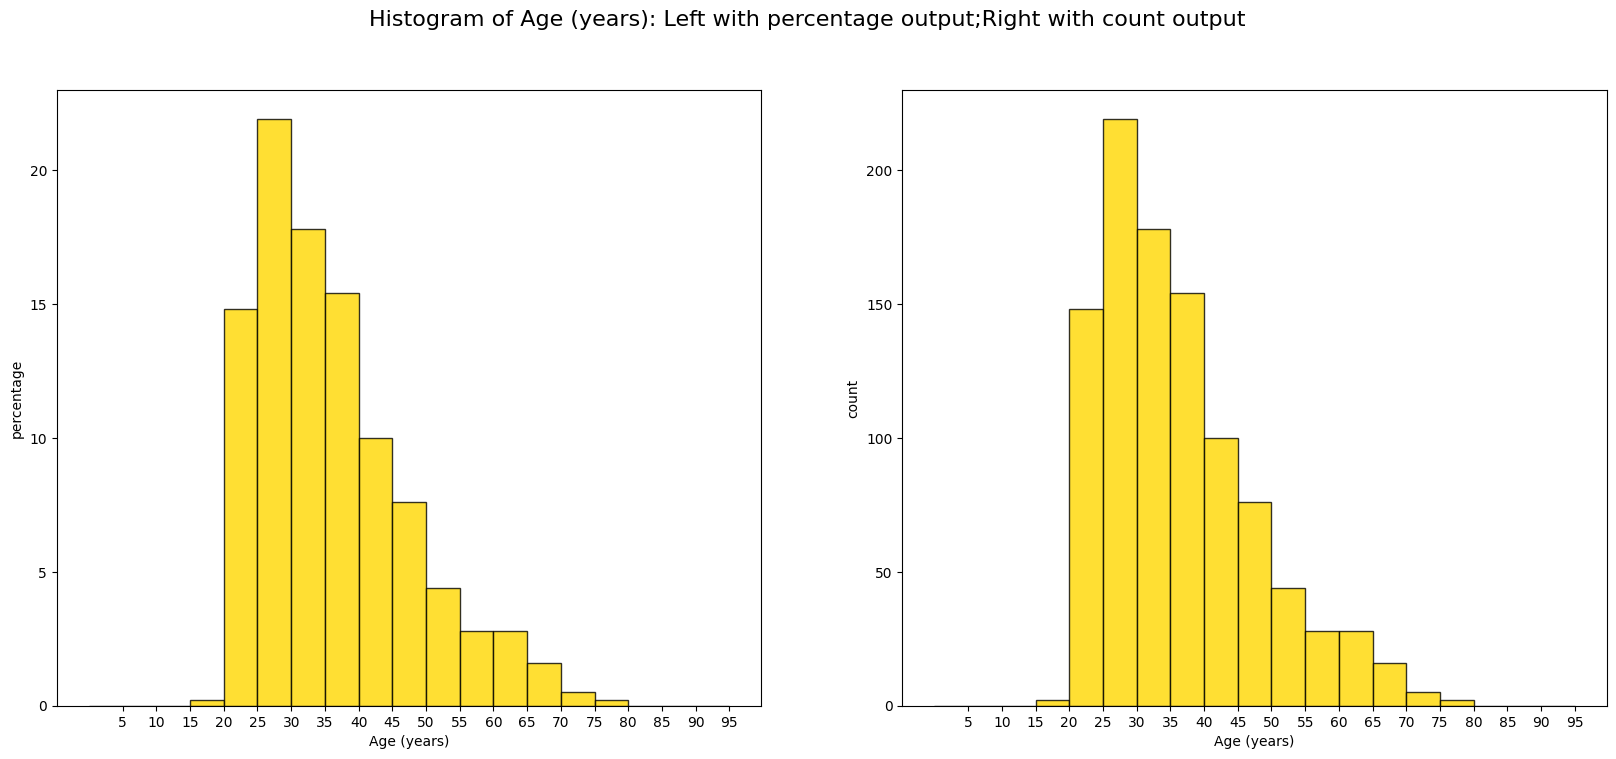

In [94]:

var = 'Age (years)'
x = data1[var]
bins = np.arange(0, 100, 5.0)

hist, bin_edges = np.histogram(x,bins, weights=np.zeros_like(x) + 100. / x.size) #画百分比的

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)

# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1,alpha=0.8,ec ='black', color='gold')
# # Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])
# Set the xticklabels to a string that tells us what the bin edges were
labels =['{}'.format(int(bins[i+1])) for i,j in enumerate(hist)]
# labels.insert(0,'0')
ax.set_xticklabels(labels)
plt.xlabel(var)
plt.ylabel('percentage')

hist, bin_edges = np.histogram(x,bins) # make the histogram，直接画频数的
ax = fig.add_subplot(1, 2, 2)
# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1,alpha=0.8,ec ='black', color='gold')
# # Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])
# Set the xticklabels to a string that tells us what the bin edges were
labels =['{}'.format(int(bins[i+1])) for i,j in enumerate(hist)]
# labels.insert(0,'0')
ax.set_xticklabels(labels)
plt.xlabel(var)
plt.ylabel('count')
plt.suptitle('Histogram of {}: Left with percentage output;Right with count output'.format(var), size=16)
plt.show()
#fig.savefig(var+".pdf", bbox_inches='tight')



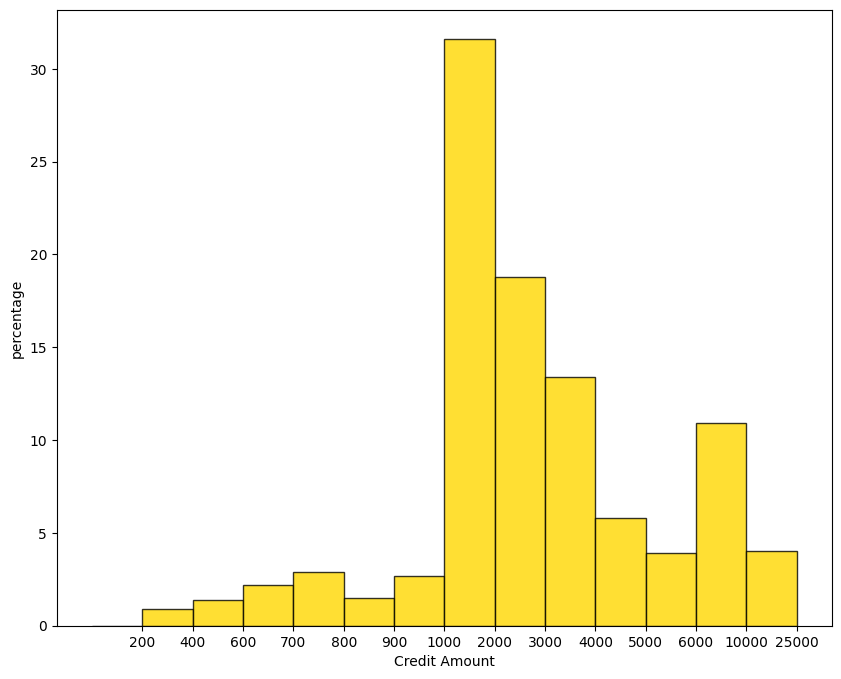

In [92]:

var = 'Credit Amount'
plot_data = df.select(var).toPandas()
x= plot_data[var]
bins =[0,200,400,600,700,800,900,1000,2000,3000,4000,5000,6000,10000,25000]
hist, bin_edges = np.histogram(x,bins,weights=np.zeros_like(x) + 100. / x.size) # make the histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1,alpha=0.8,ec ='black',color = 'gold')
# # Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])
# Set the xticklabels to a string that tells us what the bin edges were
#labels =['{}k'.format(int(bins[i+1]/1000)) for i,j in enumerate(hist)]
labels =['{}'.format(bins[i+1]) for i,j in enumerate(hist)]
# labels.insert(0,'0')
ax.set_xticklabels(labels)
#plt.text(-0.6, -1.4,'0')
plt.xlabel(var)
plt.ylabel('percentage')
plt.show()

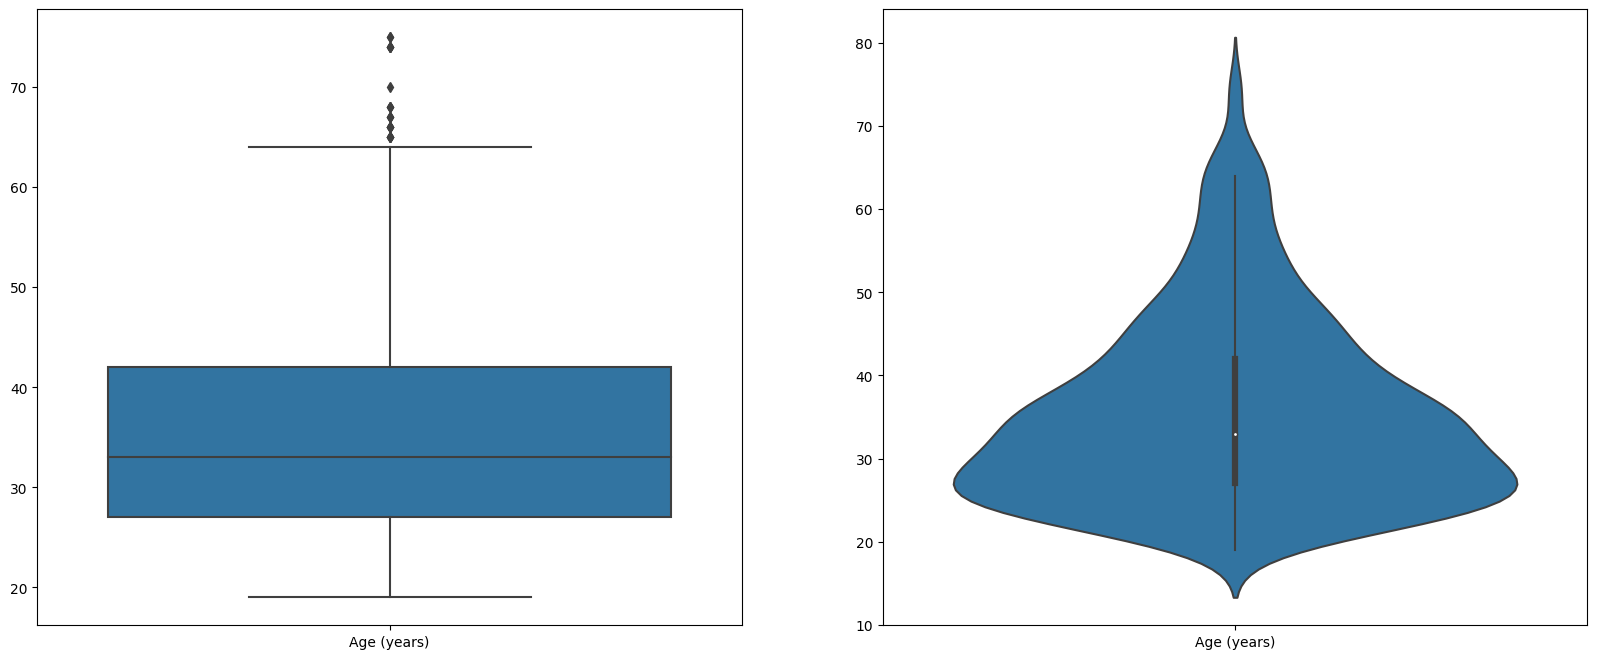

In [95]:
import seaborn as sns

x = df.select(var).toPandas() #都转成pandas去画
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)
ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)
plt.show()


# 离散化，区间化

In [96]:
#when的时候调用df的各列要用df['各列名']
df = df.withColumn('age_class', F.when(df['Age (years)']<25, '<25')\
.when(df['Age (years)']<35, '25-34')\
.when(df['Age (years)']<45, '35-44')\
.when(df['Age (years)']<55, '45-54')\
.when(df['Age (years)']<65, '55-64')\
.otherwise('65+'))

In [97]:
df.select('age_class').show(5)
#得到了一个分类变量

+---------+
|age_class|
+---------+
|      <25|
|    35-44|
|      <25|
|    35-44|
|    35-44|
+---------+
only showing top 5 rows



In [101]:
from pyspark.sql import functions as F
from pyspark.sql.functions import rank,sum,col
from pyspark.sql import Window
window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)


tab = df.select(['age_class','Credit Amount']).\
groupBy('age_class').\
agg(F.count('Credit Amount').alias('Credit_num'),
F.mean('Credit Amount').alias('Credit_avg'),
F.min('Credit Amount').alias('Credit_min'),
F.max('Credit Amount').alias('Credit_max')).\
withColumn('total',sum(col('Credit_num')).over(window)).\
withColumn('Percent',col('Credit_num')*100/col('total')).\
drop(col('total')) #total这一列全是一个值

tab.show()

+---------+----------+------------------+----------+----------+-------+
|age_class|Credit_num|        Credit_avg|Credit_min|Credit_max|Percent|
+---------+----------+------------------+----------+----------+-------+
|    45-54|       120|3183.0666666666666|       338|     12612|   12.0|
|      <25|       150| 2970.733333333333|       276|     15672|   15.0|
|    55-64|        56| 3493.660714285714|       385|     15945|    5.6|
|    35-44|       254| 3403.771653543307|       250|     15857|   25.4|
|    25-34|       397| 3298.823677581864|       343|     18424|   39.7|
|      65+|        23|3210.1739130434785|       571|     14896|    2.3|
+---------+----------+------------------+----------+----------+-------+



In [103]:
plot_data=tab.toPandas()
plot_data

,age_class,Credit_num,Credit_avg,Credit_min,Credit_max,Percent
0,45-54,120,3183.066667,338,12612,12.0
1,<25,150,2970.733333,276,15672,15.0
2,55-64,56,3493.660714,385,15945,5.6
3,35-44,254,3403.771654,250,15857,25.4
4,25-34,397,3298.823678,343,18424,39.7
5,65+,23,3210.173913,571,14896,2.3


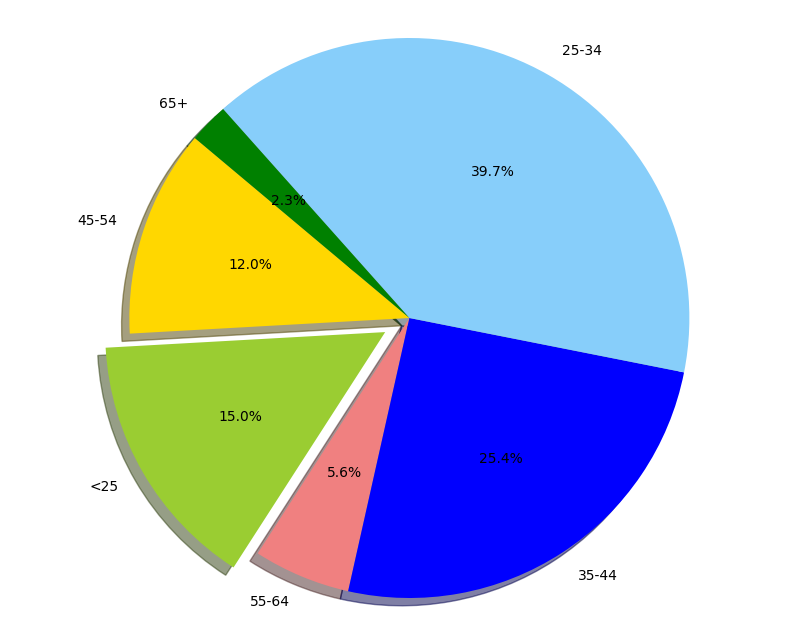

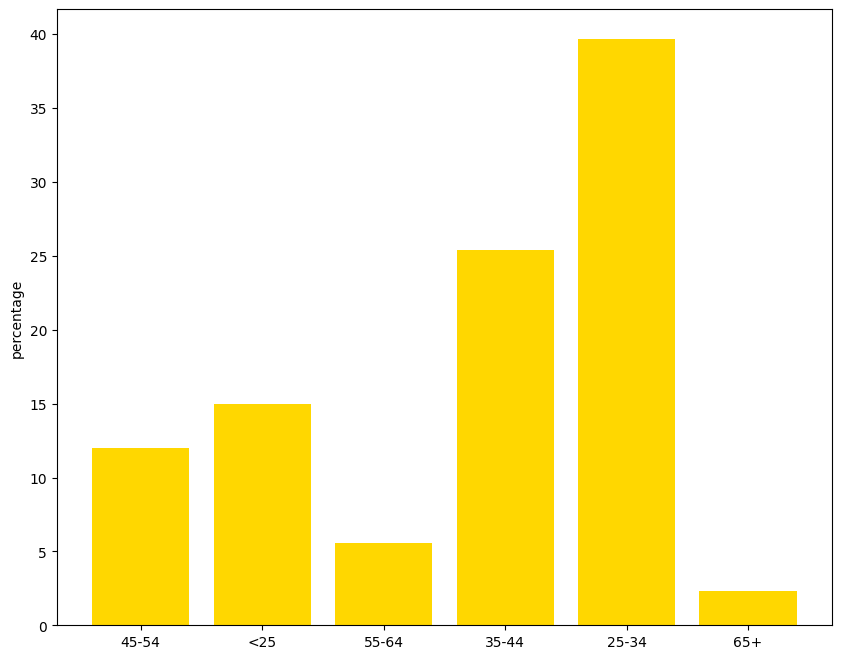

In [104]:

labels = plot_data.age_class
sizes = plot_data.Percent
colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green','red']
explode = (0, 0.1, 0, 0,0,0) # explode 1st slice，这是每一块离中心的距离
# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


labels = plot_data.age_class
missing = plot_data.Percent
ind = [x for x, _ in enumerate(labels)]
plt.figure(figsize=(10,8))
plt.bar(ind, missing, width=0.8, label='missing', color='gold')
plt.xticks(ind, labels)
plt.ylabel("percentage")
plt.show()


In [105]:
#相关系数阵
from pyspark.mllib.stat import Statistics
import pandas as pd
num_cols = ['Account Balance', 'No of dependents', 'Credit Amount']
corr_data = df.select(num_cols) #依然是sparkdataframe
col_names = corr_data.columns
features = corr_data.rdd.map(lambda row: row[0:]) #将sparkdataframe变成了rdd，把值取了出来
corr_mat = Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names
#刚把各行名列名都删了，现在又加回来
print(corr_df.to_string())

                  Account Balance  No of dependents  Credit Amount
Account Balance          1.000000         -0.014145      -0.042695
No of dependents        -0.014145          1.000000       0.017144
Credit Amount           -0.042695          0.017144       1.000000


In [107]:
col_names

['Account Balance', 'No of dependents', 'Credit Amount']

In [108]:
corr_data.show(5)

+---------------+----------------+-------------+
|Account Balance|No of dependents|Credit Amount|
+---------------+----------------+-------------+
|              1|               1|         1049|
|              1|               2|         2799|
|              2|               1|          841|
|              1|               2|         2122|
|              1|               1|         2171|
+---------------+----------------+-------------+
only showing top 5 rows



In [111]:
corr_data.rdd.collect()[:3]

[Row(Account Balance=1, No of dependents=1, Credit Amount=1049),
 Row(Account Balance=1, No of dependents=2, Credit Amount=2799),
 Row(Account Balance=2, No of dependents=1, Credit Amount=841)]

In [112]:
corr_data.rdd.collect()[0]

Row(Account Balance=1, No of dependents=1, Credit Amount=1049)

In [113]:
corr_data.rdd.collect()[0][0:] #把值取了出来

(1, 1, 1049)

In [114]:
corr_mat#输入一个rdd，输出的是一个np的array

array([[ 1.        , -0.01414543, -0.04269513],
       [-0.01414543,  1.        ,  0.01714358],
       [-0.04269513,  0.01714358,  1.        ]])

In [117]:
from pyspark.sql import Row
Row(A=1,B=2.2,C=3,D=4.5)

Row(A=1, B=2.2, C=3, D=4.5)

In [118]:
Row(A=1,B=2.2,C=3,D=4.5)[0:]

(1, 2.2, 3, 4.5)

元组里的元素最多22个元素，但是python里没有这个限制
